In [10]:
import os
import matplotlib.pyplot as plt
import librosa
%matplotlib inline

In [ ]:
def rms_track(data, hopSize, winSize): 
    offsets = np.arange(0, len(data), hopSize)
    rms_track = np.zeros(len(offsets))
    
    for (m,o) in enumerate(offsets): 
        frame = data[o:o+winSize] 
        rms_track[m] = np.sqrt(np.mean(np.square(frame)))  
    return (rms_track)

**Driver**

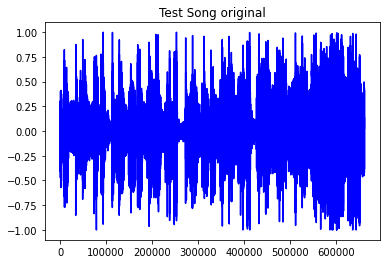

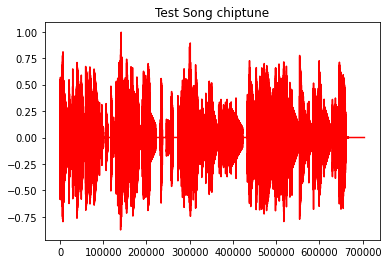

In [65]:
audio_file="pop.00000.wav"

input_song_path = os.path.join("input_songs", audio_file)
input_song_name = audio_file[:-4]

song_audio,sr = librosa.load(input_song_path)


#plot original song
plt.figure()
plt.title('Test Song original')
plt.plot(song_audio,color = 'blue')

#show final chiptune 
chiptune ='pop.00000_chiptune.wav'

song,sr = librosa.load(chiptune)

plt.figure()
plt.title("Test Song chiptune")
plt.plot(song,color = 'red')

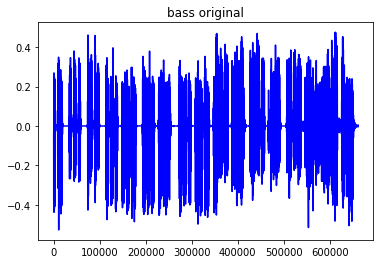

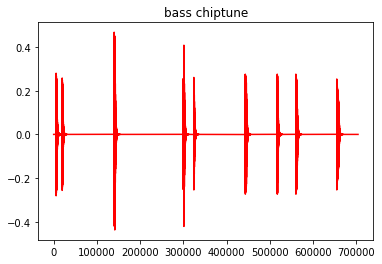

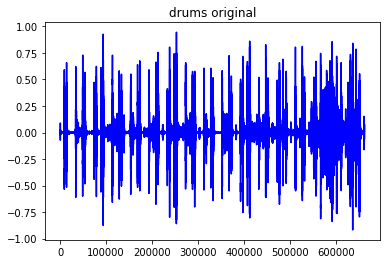

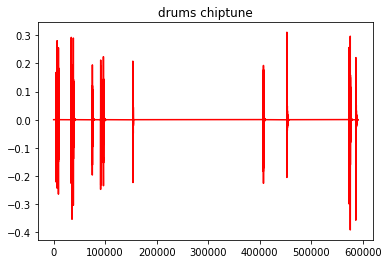

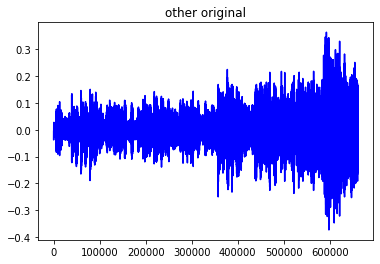

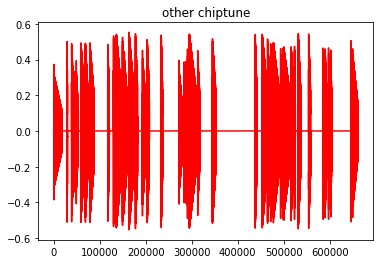

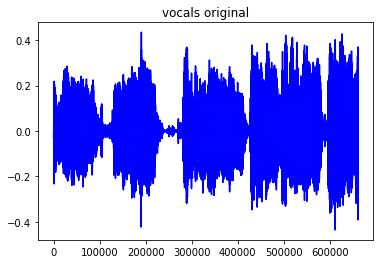

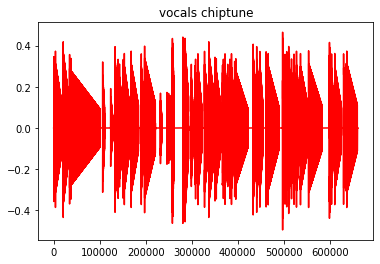

In [59]:
#plot wav stems
plt.figure()
spleeter_stem_path = os.path.join('temp_data','spleeter_output',audio_file[:-4])
chiptune_stem_path = os.path.join('temp_data','chiptune_stems',audio_file[:-4])

for i,(stem,chip) in enumerate(list(zip(os.listdir(spleeter_stem_path),os.listdir(chiptune_stem_path)))):
    plt.title(stem[:-4]+' original')
    stem_audio,sr_stem = librosa.load(os.path.join(spleeter_stem_path,stem))
    plt.plot(stem_audio,color = 'blue')
    plt.show()
    
    plt.title(chip[:-4]+' chiptune')
    stem_audio,sr_stem = librosa.load(os.path.join(chiptune_stem_path,stem))
    plt.plot(stem_audio,color = 'red')
    plt.show()
        


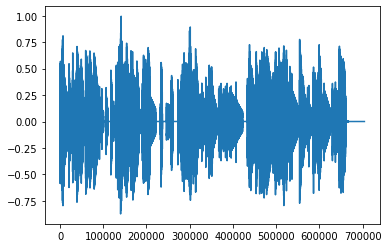

In [60]:
#show final chiptune 
chiptune ='pop.00000_chiptune.wav'

song,sr = librosa.load(chiptune)

plt.figure()
plt.plot(song)

In [18]:
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
from librosa import *
import IPython.display as ipd

In [6]:
drum_stem_path = os.path.join('temp_data','spleeter_output','pop.00000','drums.wav')
drum_track,sr = librosa.load(drum_stem_path)
bpm = librosa.beat.tempo(drum_track)

In [31]:
# Function to remove all but kick and snare sounds from drum track
def drum_scrub(drum_audio, sr, bpm, amp=0.6):

    drum_scrubbed = np.zeros(len(drum_audio))
    max_note = round((bpm[0]/60/2/2/2/2)*sr)  # 64th note

    j=0
    while j<len(drum_audio):
        if np.abs(drum_audio[j]) > float(amp):
            drum_scrubbed[j:j+max_note] = drum_audio[j:j+max_note]
            j += max_note
        else: j+=1

    return drum_scrubbed

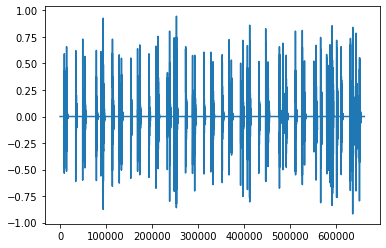

In [32]:
#Scrubbed Drums
scrubbed_drums = drum_scrub(drum_track,sr,bpm,0.5)

plt.figure()
plt.plot(scrubbed_drums)
plt.show()

ipd.Audio(scrubbed_drums,rate=sr)

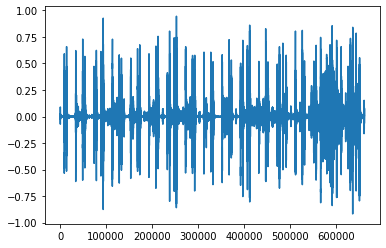

In [21]:
#Original Drums

plt.figure()
plt.plot(drum_track)
plt.show()

ipd.Audio(drum_track,rate=sr)